In [200]:
import osmnx
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from shapely.geometry import Point

import geopandas as gpd
from shapely.geometry import box

In [73]:
PLACE_OF_INTEREST = "Leeds, United Kingdom"
G = osmnx.graph_from_place (PLACE_OF_INTEREST, network_type='drive')
n_private_roads = 0
for u, v, data in G.edges(data=True):
    if 'highway' in data and data['highway'] == 'private':
        n_private_roads += 1 

# Print the number of private roads
print(f'There are {n_private_roads} private roads in the network')

There are 0 private roads in the network


In [6]:
leeds_edges = list(G.edges (data=True))

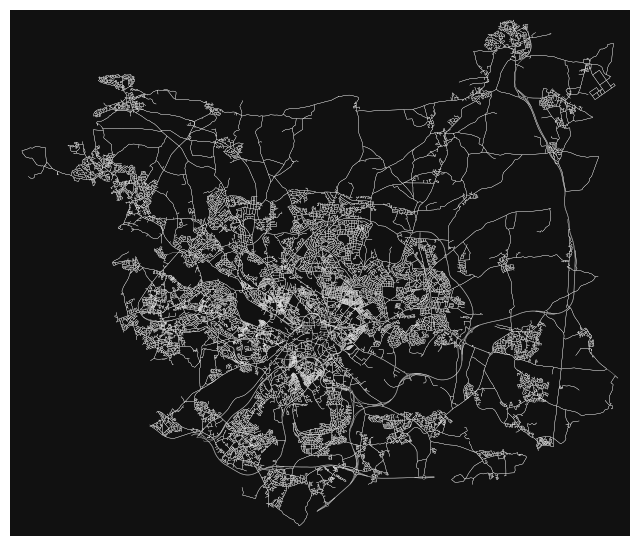

In [74]:
fig, ax = osmnx.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2, show=False)
plt.show()

In [130]:
data = pd.read_csv('Traffic accidents_2019_Leeds.csv')
df1 = pd.DataFrame(data)
data = pd.read_csv('RTC 2018_Leeds.csv')
df2 = pd.DataFrame(data)
data = pd.read_csv('2014.csv', encoding='iso-8859-1')
df3 = pd.DataFrame(data)
data = pd.read_csv('2015.csv',encoding='iso-8859-1')
df4 = pd.DataFrame(data)
df = pd.concat([df1, df2, df3, df4], axis=0)
df

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Accident Fields_Reference Number,Vehicle Fields_Reference Number,Casualty Fields_Reference Number,Casualty Veh No,Unnamed: 11
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,2,6,NaN,NaN,NaN,NaN,NaN
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,1,9,NaN,NaN,NaN,NaN,NaN
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,2,39,NaN,NaN,NaN,NaN,NaN
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,1,5,NaN,NaN,NaN,NaN,NaN
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,2,8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2CV1152,430942,435672,3,31-Dec-15,1908,A,NaN,Wet / Damp,Darkness: street lights present and lit,...,Taxi/Private hire car,Passenger,Slight,Female,4,NaN,NaN,NaN,NaN,NaN
2660,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,Car,Driver/Rider,Slight,Female,23,NaN,NaN,NaN,NaN,NaN
2661,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,Car,Passenger,Slight,Female,23,NaN,NaN,NaN,NaN,NaN
2662,31F0582,430278,434811,1,27-Nov-15,1600,Unclassified,NaN,Dry,Darkness: street lights present and lit,...,Car,Pedestrian,Slight,Female,76,NaN,NaN,NaN,NaN,NaN


In [90]:
# # calculate spatial diameter
diameter = nx.algorithms.distance_measures.diameter(G)

# calculate average street length
edge_lengths = []
for u, v, k, data in G.edges(keys=True, data=True):
    if "length" in data:
        edge_lengths.append(data["length"])
avg_street_length = sum(edge_lengths) / len(edge_lengths)

# calculate node density
num_nodes = len(G.nodes)
area = osmnx.projection.project_graph(G).size
node_density = num_nodes / area

# calculate intersection density
num_edges = len(G.edges)
intersection_density = num_nodes / num_edges

# calculate edge density
edge_density = num_edges / area

# calculate average circuitry
strongly_connected_components = nx.algorithms.strongly_connected_components(G)
num_scc = len(list(strongly_connected_components))
avg_circuitry = num_edges / (num_nodes - num_scc)

# check if network is planar
is_planar = nx.check_planarity(nx.Graph(G))

# # print results
# print(f"Spatial diameter: {diameter}")
print(f"Average street length: {avg_street_length:.2f} meters")
print(f"Node density: {node_density:.5f} nodes per square meter")
print(f"Intersection density: {intersection_density:.5f} intersections per edge")
print(f"Edge density: {edge_density:.5f} edges per square meter")
print(f"Average circuitry: {avg_circuitry:.2f}")
print(f"Is the network planar? {is_planar}")

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [131]:
# create a transformer object to convert from BNG to WGS84
transformer = pyproj.Transformer.from_crs('EPSG:27700', 'EPSG:4326')

# apply the transformation to the easting and northing columns of the DataFrame
df['Latitude'], df['Longitude'] = transformer.transform(df['Grid Ref: Easting'].values, df['Grid Ref: Northing'].values)
df["coordinates"] = list(zip(df["Latitude"], df["Longitude"]))
df

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Sex of Casualty,Age of Casualty,Accident Fields_Reference Number,Vehicle Fields_Reference Number,Casualty Fields_Reference Number,Casualty Veh No,Unnamed: 11,Latitude,Longitude,coordinates
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,2,6,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)"
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,1,9,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)"
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,2,39,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)"
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,1,5,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)"
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,2,8,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2CV1152,430942,435672,3,31-Dec-15,1908,A,NaN,Wet / Damp,Darkness: street lights present and lit,...,Female,4,NaN,NaN,NaN,NaN,NaN,53.816414,-1.531520,"(53.81641390594899, -1.531519805143614)"
2660,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,Female,23,NaN,NaN,NaN,NaN,NaN,53.817808,-1.515966,"(53.81780824658062, -1.5159658160451377)"
2661,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,Female,23,NaN,NaN,NaN,NaN,NaN,53.817808,-1.515966,"(53.81780824658062, -1.5159658160451377)"
2662,31F0582,430278,434811,1,27-Nov-15,1600,Unclassified,NaN,Dry,Darkness: street lights present and lit,...,Female,76,NaN,NaN,NaN,NaN,NaN,53.808714,-1.541689,"(53.808714482440756, -1.541688977244855)"


In [139]:
accidents_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
G_proj = osmnx.project_graph(G)

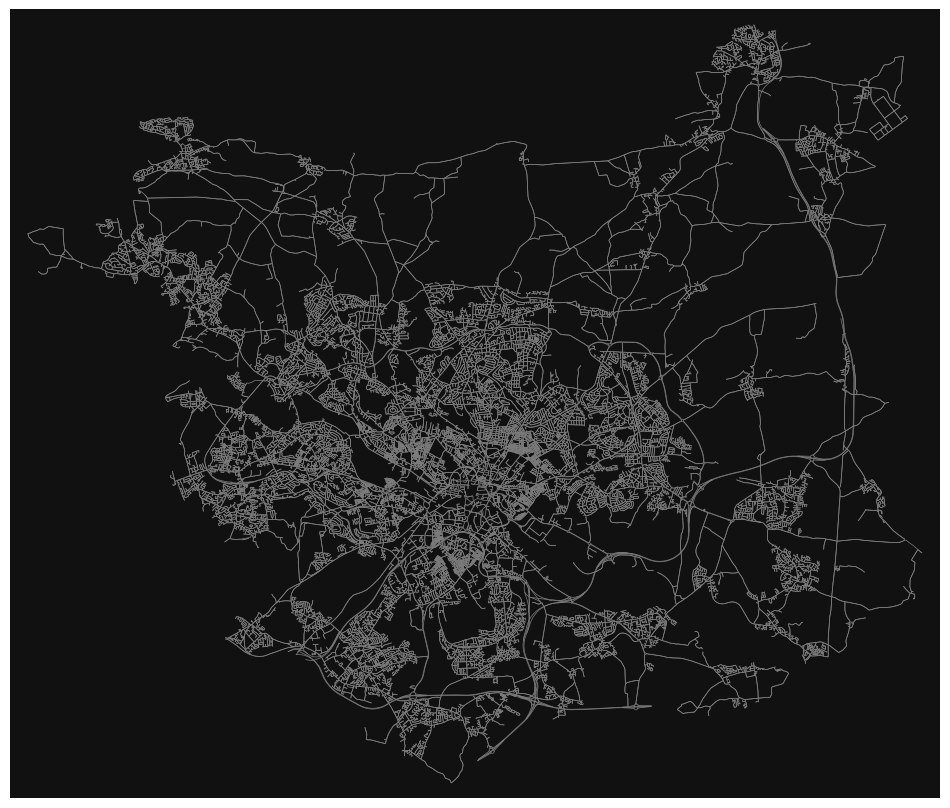

In [145]:
fig, ax = osmnx.plot_graph(G_proj, node_size=0, edge_color="gray", edge_linewidth=0.5, figsize=(12, 12), show=False)

# Plot the accidents
accidents_gdf.plot(ax=ax, markersize=50, color="red")
plt.show()


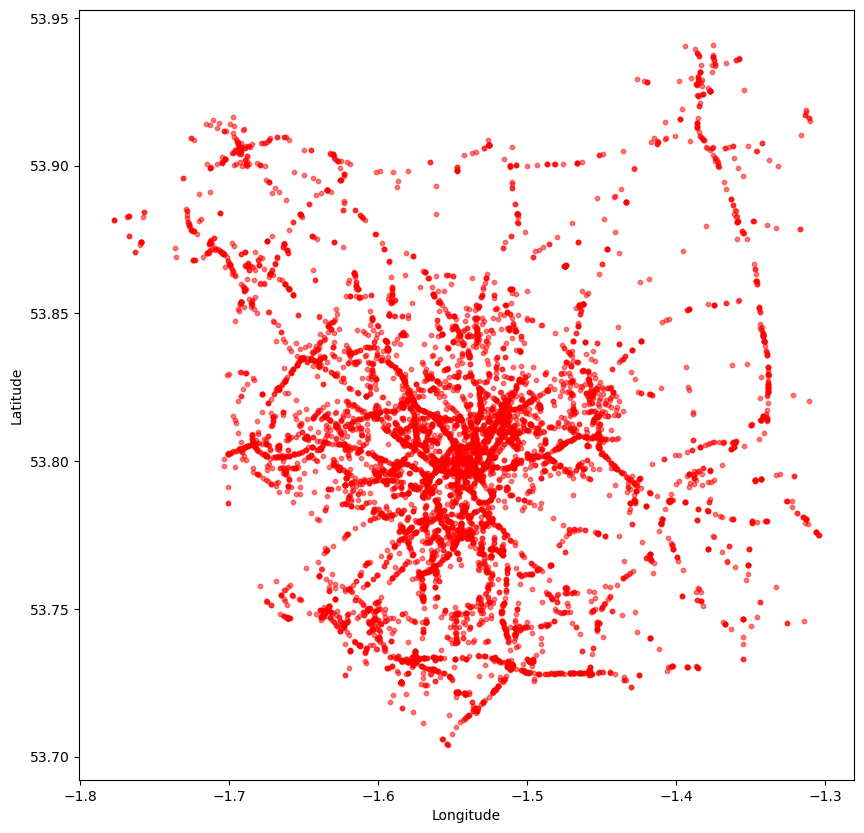

In [146]:
fig, ax = plt.subplots(figsize=(10,10))

# plot the accidents as scatter points
ax.scatter(df['Longitude'], df['Latitude'], s=10, color='red', alpha=0.5)

# set the x and y axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# show the plot
plt.show()


<AxesSubplot:>

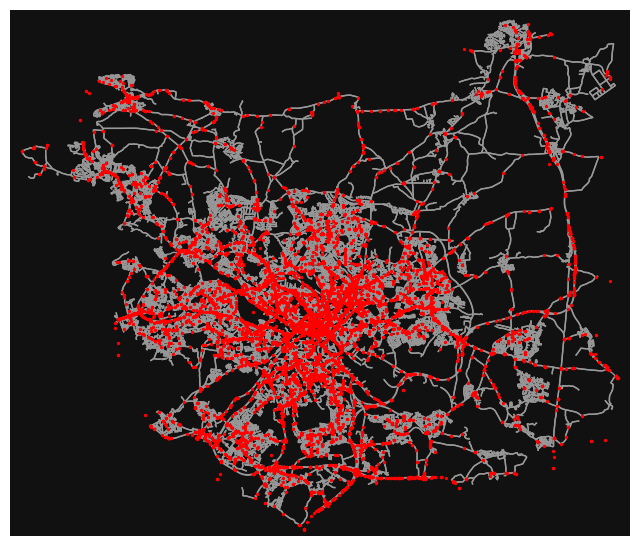

In [170]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# create a GeoDataFrame from the accidents data
gdf_accidents = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"],crs="EPSG:4326")
)
# reproject the accident points to the same CRS as the street network
gdf_accidents = gdf_accidents.to_crs(G.graph["crs"])
# plot the street network and accident points
fig, ax = osmnx.plot_graph(G, node_size=0, show=False, close=False)
gdf_accidents.plot(ax=ax, color='red', markersize=2)


In [171]:
gdf_accidents

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Age of Casualty,Accident Fields_Reference Number,Vehicle Fields_Reference Number,Casualty Fields_Reference Number,Casualty Veh No,Unnamed: 11,Latitude,Longitude,coordinates,geometry
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,6,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)",POINT (-1.45255 53.80965)
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,9,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)",POINT (-1.45255 53.80965)
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,39,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)",POINT (-1.45255 53.80965)
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,5,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)",POINT (-1.45255 53.80965)
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,8,NaN,NaN,NaN,NaN,NaN,53.809653,-1.452551,"(53.8096532187143, -1.4525511245107487)",POINT (-1.45255 53.80965)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2CV1152,430942,435672,3,31-Dec-15,1908,A,NaN,Wet / Damp,Darkness: street lights present and lit,...,4,NaN,NaN,NaN,NaN,NaN,53.816414,-1.531520,"(53.81641390594899, -1.531519805143614)",POINT (-1.53152 53.81641)
2660,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,23,NaN,NaN,NaN,NaN,NaN,53.817808,-1.515966,"(53.81780824658062, -1.5159658160451377)",POINT (-1.51597 53.81781)
2661,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,23,NaN,NaN,NaN,NaN,NaN,53.817808,-1.515966,"(53.81780824658062, -1.5159658160451377)",POINT (-1.51597 53.81781)
2662,31F0582,430278,434811,1,27-Nov-15,1600,Unclassified,NaN,Dry,Darkness: street lights present and lit,...,76,NaN,NaN,NaN,NaN,NaN,53.808714,-1.541689,"(53.808714482440756, -1.541688977244855)",POINT (-1.54169 53.80871)


In [180]:
grid_size = 1000  # size of each square in meters
xmin, ymin, xmax, ymax = gdf_accidents.total_bounds

grid = gpd.GeoDataFrame(geometry=gpd.GeoSeries([box(x, y, x+int(cell_size), y+int(cell_size)) for x in range(int(xmin), int(xmax), int(cell_size)) for y in range(int(ymin), int(ymax), int(cell_size))]), crs=gdf_accidents.crs)
# plot the grid on top of the street network and accidents
fig, ax = osmnx.plot_graph(G, node_size=0, show=False, close=False)
grid.plot(ax=ax, edgecolor='black', facecolor='none')
gdf_accidents.plot(ax=ax, color='red', markersize=2)

# get the count of accidents for each square
grid['accident_count'] = accidents_by_grid

# print the number of accidents in each square
print(grid['accident_count'])

ValueError: range() arg 3 must not be zero

In [183]:
df_accidents_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='counts')

# sort the locations by the number of accidents in descending order
df_accidents_counts = df_accidents_counts.sort_values(by='counts', ascending=False)
df_accidents_counts

,Latitude,Longitude,counts
3206,53.801680,-1.533142,13
2576,53.796663,-1.532757,11
6215,53.866144,-1.475035,10
6066,53.853883,-1.692229,10
6641,53.925179,-1.377505,10
...,...,...,...
2564,53.796626,-1.642230,1
2563,53.796614,-1.534048,1
2562,53.796611,-1.533228,1
2561,53.796607,-1.475615,1


In [193]:
import geopandas as gpd
from shapely.geometry import Polygon

# Define bounding box for area of interest
bbox = [53.7949, -1.5581, 53.8040, -1.5448]  # [min_lat, min_lon, max_lat, max_lon]

# Define grid parameters
n_rows = 10
n_cols = 10

# Create grid cell polygons
cell_size = (bbox[2] - bbox[0]) / n_rows  # assuming equal size for rows and columns
xmin, ymin, xmax, ymax = bbox
polygons = []
for i in range(n_rows):
    y1 = ymin + i * cell_size
    y2 = y1 + cell_size
    for j in range(n_cols):
        x1 = xmin + j * cell_size
        x2 = x1 + cell_size
        polygons.append(Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)]))

# Create GeoDataFrame for grid cell polygons
grid_cells.crs = "epsg:4326"
grid_cells = gpd.GeoDataFrame({'id': range(len(polygons))}, geometry=polygons)

# Load accident data and count accidents within each grid cell
counts = gpd.sjoin(gdf_accidents, grid_cells, predicate='within').groupby('id').size().reset_index(name='accident_count')
grid_cells = grid_cells.merge(counts, on='id', how='left')
grid_cells['accident_count'] = grid_cells['accident_count'].fillna(0).astype(int)


/var/folders/cy/wq8cw_n951db1z5xgm5fdjz00000gn/T/ipykernel_19968/3035754768.py:28: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  counts = gpd.sjoin(gdf_accidents, grid_cells, predicate='within').groupby('id').size().reset_index(name='accident_count')


In [177]:
grid

,geometry,accident_count


/Users/muhammadkamdar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/cy/wq8cw_n951db1z5xgm5fdjz00000gn/T/ipykernel_19968/1700409966.py:17: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  accidents_by_grid = gpd.sjoin(accidents, grid, op='within').groupby('index_right').size()


<AxesSubplot:>

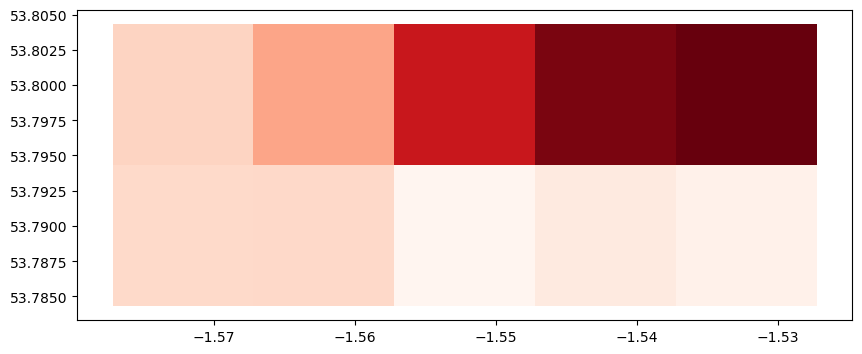

In [158]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
accidents = gpd.GeoDataFrame(df, geometry=geometry)
accidents = accidents.to_crs(G.graph["crs"])
# Define the study area bounds
north, south, east, west = 53.8096, 53.7843, -1.5213, -1.5772

# Define the grid cell size (in degrees)
cell_size = 0.01

# Create a grid of square polygons that covers the study area
grid = gpd.GeoDataFrame(geometry=gpd.GeoSeries([box(west + x*cell_size, south + y*cell_size, 
                                                      west + (x+1)*cell_size, south + (y+1)*cell_size) 
                                                for y in range(int((north-south)/cell_size)) 
                                                for x in range(int((east-west)/cell_size))]))

# Perform a spatial join to count the number of accidents in each grid cell
accidents_by_grid = gpd.sjoin(accidents, grid, op='within').groupby('index_right').size()

# Merge the accident counts back into the grid dataframe
grid['accidents'] = accidents_by_grid

# Plot the grid cells colored by accident count
grid.plot(column='accidents', cmap='Reds', figsize=(10,10))


In [162]:
centre_lat = 53.797035
centre_lon = -1.542537
study_area = box(centre_lon - 0.5, centre_lat - 0.5, centre_lon + 0.5, centre_lat + 0.5)

# Filter the accidents dataset to only include those within the study area
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Filter the accidents dataset to only include those within the study area
gdf = gdf[gdf.within(study_area)]

# Define a grid of square polygons that covers the study area
cell_size = 0.01
grid = gpd.GeoDataFrame(geometry=gpd.GeoSeries([box(study_area.bounds[0] + x*cell_size, 
                                                      study_area.bounds[1] + y*cell_size, 
                                                      study_area.bounds[0] + (x+1)*cell_size, 
                                                      study_area.bounds[1] + (y+1)*cell_size) 
                                                for y in range(int(study_area.bounds[3]-study_area.bounds[1]//cell_size))
                                                for x in range(int(study_area.bounds[2]-study_area.bounds[0]//cell_size))]))
grid = grid.to_crs(gdf.crs)

# Spatially join the accidents and grid datasets to count the number of accidents in each square
accidents_by_grid = gpd.sjoin(gdf, grid, predicate='within').groupby('index_right').size()

# Filter the grid to only include cells with 300 or more accidents
high_accident_cells = grid.iloc[accidents_by_grid[accidents_by_grid >= 300].index]

# Plot the high accident cells on top of the study area
ax = high_accident_cells.plot(facecolor='none', edgecolor='red', alpha=1, linewidth=2)
gpd.GeoSeries(study_area).plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2)
ax.set_axis_off()

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [102]:

def get_accidents_count(north, south, east, west):
    accidents_in_region = df[(df.Latitude >= south) &
                                    (df.Latitude <= north) &
                                    (df.Longitude >= west) &
                                    (df.Longitude <= east)]
    return len(accidents_in_region)

In [128]:
center_point = Point(-1.5482, 53.7998)

# define the radius of the area you want to analyze in meters
radius = 1

gdf_accidents = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# create a buffer around the center point to define the area of analysis
buffer = gpd.GeoSeries([center_point]).buffer(radius)
buffer = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer))

# filter the accidents data to only include accidents within the buffer area
gdf_accidents_within_area = gdf_accidents[gdf_accidents.within(buffer.iloc[0])]

# count the number of accidents within the buffer area
accidents_count = len(gdf_accidents_within_area)

# print the number of accidents within the buffer area
print(f"Number of accidents within {radius} meters of {center_point}: {accidents_count}")

accidents_within_area = gpd.tools.sjoin(gdf_accidents, buffer, how="inner", op='within')

ax = buffer.plot(color='lightblue', alpha=0.5, figsize=(10,10))
accidents_within_area.plot(ax=ax, markersize=1, color='red')

TypeError: (<class 'geopandas.geoseries.GeoSeries'>, <class 'pandas.core.series.Series'>)

In [113]:
distance = 500
center_point = '53.7998, -1.5482'

gdf_bbox = osmnx.geocode_to_gdf(center_point, distance)

# extract coordinates of bounding box
north, south, east, west = gdf_bbox.total_bounds

print(get_accidents_count(north, south, east, west))

ValueError: Nominatim geocoder only returned 1 result(s) for query "53.7998, -1.5482"